In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## Classification Feature Selection using Coefficient Values

In [5]:
# Load BNP Paribas dataset from Kaggle
data=pd.read_csv('../datasets/paribas.csv',nrows=50000)
data.head()

ID  target        v1        v2 v3        v4         v5        v6        v7  \
0   3       1  1.335739  8.727474  C  3.921026   7.915266  2.599278  3.176895   
1   4       1       NaN       NaN  C       NaN   9.191265       NaN       NaN   
2   5       1  0.943877  5.310079  C  4.410969   5.326159  3.979592  3.928571   
3   6       1  0.797415  8.304757  C  4.225930  11.627438  2.097700  1.987549   
4   8       1       NaN       NaN  C       NaN        NaN       NaN       NaN   

         v8  ...      v122      v123      v124  v125      v126      v127  \
0  0.012941  ...  8.000000  1.989780  0.035754    AU  1.804126  3.113719   
1  2.301630  ...       NaN       NaN  0.598896    AF       NaN       NaN   
2  0.019645  ...  9.333333  2.477596  0.013452    AE  1.773709  3.922193   
3  0.171947  ...  7.018256  1.812795  0.002267    CJ  1.415230  2.954381   
4       NaN  ...       NaN       NaN       NaN     Z       NaN       NaN   

       v128  v129      v130      v131  
0  2.024285     0  0.636365  2.857144  
1  1.957825     0       NaN       NaN  
2  1.120468     2  0.883118  1.176472  
3  1.990847     1  1.677108  1.034483  
4       NaN     0       NaN       NaN  

[5 rows x 133 columns]

In [6]:
# Inpractise, feature selection should be done after data preprocessing
# So Ideally, all the categorical variables are enocded into numbers,
# and then you can assess whether they are correlated with other features

# here for simplicity I will use only numerical variables
# Select numerical columns
numericals=['int16','int32','int64','float16','float32','float64']
numerical_vars=list(data.select_dtypes(include=numericals).columns)
data=data[numerical_vars]
data.shape

(50000, 114)

In [7]:
# Split the dataset into training and testing to avoid overfitting.
x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['ID','target'],axis=1),
                                              data['target'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((35000, 112), (15000, 112))

In [8]:
# We need to normalise the data since we are using linear model
scaler=StandardScaler()
scaler.fit(x_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
# Here we'll perform model fitting and feature selection all in one step.
# Since we want to keep the coefficient values unaffected after regularisation,
# to do this, we need to keep the value of coefficient of regularisation(i.e. lambda)
# as less as possible. This can be done by keeping the value of 'C' really high .

sel_=SelectFromModel(LogisticRegression(C=1000,multi_class='ovr',penalty='l2',solver='liblinear'))
sel_.fit(scaler.transform(x_train.fillna(0)),y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='ovr',
                                             n_jobs=None, penalty='l2',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [31]:
sel_.get_support()

array([False, False, False, False, False,  True, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [32]:
# get the count of features
print(np.sum(sel_.get_support()))
np.sum(sel_.estimator_.coef_==0)

31


0

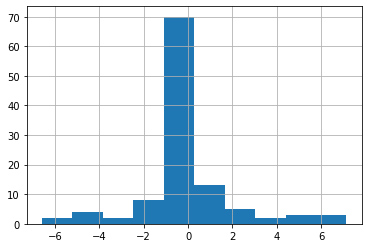

In [33]:
# understanding the distribution of values
pd.Series(sel_.estimator_.coef_.ravel()).hist()

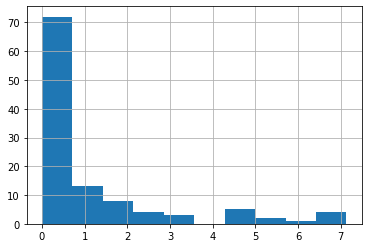

In [34]:
# understanding larger values if present
pd.Series(abs(sel_.estimator_.coef_.ravel())).hist()

Hence, we can see that there are few values greater than 1 and contributes significantly for the prediction.<br>
Now, checking the number of coefficients greater then the mean of the distribution.

In [35]:
np.sum(np.abs(sel_.estimator_.coef_)>np.abs(sel_.estimator_.coef_).mean())

31

In [37]:
select_features=x_train.columns[sel_.get_support()]
len(select_features)
print('total features: {}'.format(x_train.shape[1]))
print('selected features: {}'.format(len(select_features)))
print('features with coefficients greater than the mean: {}'.format(np.sum(np.abs(sel_.estimator_.coef_)>np.abs(sel_.estimator_.coef_).mean())))

total features: 112
selected features: 31
features with coefficients greater than the mean: 31
